# Comparison of enrollment in non-English languages at public AAU institutions and the University of Oklahoma

To assist in the discussion about the foreign language requirement in the Dodge Family College of Arts and Sciences (DFCAS) at the University of Oklahoma, I'm providing this Jupyter notebook that shows an analysis of data from the [Modern Language Association's](https://www.mla.org/) "[Language Enrollment Database, 1958–2021](https://apps.mla.org/flsurvey_search)".

I'll interpose commentary and analysis in between the cells of Python code below.

I'm primarily using the [Pandas](https://pandas.pydata.org/) library for data analysis in Python.

In [1]:
# Import pandas for working with Excel data
import pandas as pd
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Import os for interacting with the operating system
import os

## Data Preparation

To ensure that I'm using the canonical version of the MLA's data, I'll download the Excel workbook directly from the MLA's web site.

In [2]:
# Read in the MLA's data as a Pandas dataframe
df = pd.read_excel('https://www.mla.org/content/download/191323/file/Historical-language-enrollments-1958-2021.xlsx')

In [3]:
# Get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228246 entries, 0 to 228245
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   INST_ID            227812 non-null  float64
 1   SRVY_YEAR          228246 non-null  int64  
 2   TERM               228246 non-null  object 
 3   YR&TERM            228246 non-null  object 
 4   UNIV               228246 non-null  object 
 5   CAMPUS             41688 non-null   object 
 6   NCES_ID            228246 non-null  int64  
 7   UNIV_NAME_HISTORY  139772 non-null  object 
 8   CITY               227543 non-null  object 
 9   STATE_ID           227807 non-null  float64
 10  STATE              227812 non-null  object 
 11  MLA ICLEVEL        228029 non-null  float64
 12  LANG_CODE          226715 non-null  float64
 13  LANGUAGE           226715 non-null  object 
 14  UG INTRO           76512 non-null   float64
 15  UG ADVANCED        49520 non-null   float64
 16  UG

There are 228,246 rows and 27 columns in the dataset. That's a lot! But we're only interested in certain languages taught at the University of Oklahoma and the public AAU institutions so we'll make a subset of the original dataframe.

Before doing that, however, I need to convert the `UNIV` and `LANGUAGE` columns from the `object` datatype to `string` (i.e., text) so that I can easily search and perform other operations on those columns. I also need to turn the `UG TOTAL` column into integer values.

In [4]:
df['UNIV'] = df['UNIV'].astype('string')
df['LANGUAGE'] = df['LANGUAGE'].astype('string')
df['UG TOTAL'] = df['UG TOTAL'].fillna(0).round(0).astype(int)

## Filtering the Data

We need to know how the OU and the public AAU institutions are known in this dataset. Here's a listing of all of the public AAU institutions as they appear in the [AAU's own list](https://www.aau.edu/who-we-are/our-members/aau-member-universities-year-entry):

- Arizona State University (2023)
- Georgia Institute of Technology (2010)
- Indiana University (1909)
- Michigan State University (1964)
- The Ohio State University (1916)
- The Pennsylvania State University (1958)
- Purdue University (1958)
- Rutgers University – New Brunswick (1989)
- Stony Brook University – The State University of New York (2001)
- Texas A&M University (2001)
- University at Buffalo – The State University of New York (1989)
- The University of Arizona (1985)
- University of California, Davis (1996)
- University of California, Berkeley (1900)
- University of California, Irvine (1996)
- University of California, Los Angeles (1974)
- University of California, Riverside (2023)
- University of California, San Diego (1982)
- University of California, Santa Barbara (1995)
- University of California, Santa Cruz (2019)
- University of Colorado, Boulder (1966)
- University of Florida (1985)
- University of Illinois at Urbana-Champaign (1908)
- The University of Iowa (1909)
- The University of Kansas (1909)
- University of Maryland at College Park (1969)
- University of Michigan (1900)
- University of Minnesota, Twin Cities (1908)
- University of Missouri, Columbia (1908)
- The University of North Carolina at Chapel Hill (1922)
- University of Oregon (1969)
- University of Pittsburgh (1974)
- University of South Florida (2023)
- The University of Texas at Austin (1929)
- The University of Utah (2019)
- University of Virginia (1904)
- University of Washington (1950)
- The University of Wisconsin – Madison (1900)

I've consulted the [interactive version of the MLA's database](https://www.mla.org/Resources/Guidelines-and-Data/Reports-and-Professional-Guidelines/Language-Enrollment-Database-1958-2016) to find the names the MLA uses. I'll make a Python dictionary to hold the values.

In [5]:
# Make a concordance of the names of institutions as they are known in the MLA database
institution_dict = {"Georgia Institute of Technology": "GEORGIA INST OF TECH",
                "Indiana University": "INDIANA U, BLOOMINGTON",
                "Michigan State University": "MICHIGAN SU",
                "The Ohio State University": "OHIO SU, COLUMBUS",
                "The Pennsylvania State University": "PENNSYLVANIA SU, UNIVERSITY PARK",
                "Purdue University": "PURDUE U",
                "Rutgers University – New Brunswick": "RUTGERS SU OF NEW JERSEY, NEW BRUNSWICK",
                "Stony Brook University – The State University of New York": "SUNY, STONY BROOK",
                "Texas A&M University": "TEXAS A&M U",
                "University at Buffalo – The State University of New York": "SUNY, BUFFALO",
                "The University of Arizona": "U OF ARIZONA",
                "University of California, Davis": "U OF CALIFORNIA, DAVIS",
                "University of California, Berkeley": "U OF CALIFORNIA, BERKELEY",
                "University of California, Irvine": "U OF CALIFORNIA, IRVINE",
                "University of California, Los Angeles": "U OF CALIFORNIA, LOS ANGELES",
                "University of California, Riverside": "U OF CALIFORNIA, RIVERSIDE",
                "University of California, San Diego": "U OF CALIFORNIA, SAN DIEGO",
                "University of California, Santa Barbara": "U OF CALIFORNIA, SANTA BARBARA",
                "University of California, Santa Cruz": "U OF CALIFORNIA, SANTA CRUZ",
                "University of Colorado, Boulder": "U OF COLORADO, BOULDER",
                "University of Florida": "U OF FLORIDA",
                "University of Illinois at Urbana-Champaign": "U OF ILLINOIS, URBANA-CHAMPAIGN",
                "The University of Iowa": "U OF IOWA",
                "The University of Kansas": "U OF KANSAS",
                "University of Maryland at College Park": "U OF MARYLAND, COLLEGE PARK",
                "University of Michigan": "U OF MICHIGAN, ANN ARBOR",
                "University of Minnesota, Twin Cities": "U OF MINNESOTA, TWIN CITIES",
                "University of Missouri, Columbia": "U OF MISSOURI, COLUMBIA",
                "The University of North Carolina at Chapel Hill": "U OF NORTH CAROLINA, CHAPEL HILL",
                "University of Oregon": "U OF OREGON",
                "University of Pittsburgh": "U OF PITTSBURGH",
                "The University of Texas at Austin": "U OF TEXAS, AUSTIN",
                "The University of Utah": "U OF UTAH",
                "University of Virginia": "U OF VIRGINIA",
                "University of Washington": "U OF WASHINGTON",
                "The University of Wisconsin – Madison": "U OF WISCONSIN, MADISON",
                "University of South Florida": "U OF SOUTH FLORIDA",
                "Arizona State University": "ARIZONA SU, TEMPE",
                "The University of Oklahoma": "U OF OKLAHOMA" # adding OU to the mix
                }

We need to make sure that all the names are, in fact, in the data. We'll iterate over the `institutions` dictionary and do a simple true/false check against the `UNIV` column in the dataframe.

In [6]:
for value in institution_dict.values():
    # Check if the value is in the set
    is_in_institutions = value in set(df["UNIV"].tolist())
    # Print the output
    print(f"{value}: {is_in_institutions}")

GEORGIA INST OF TECH: True
INDIANA U, BLOOMINGTON: True
MICHIGAN SU: True
OHIO SU, COLUMBUS: True
PENNSYLVANIA SU, UNIVERSITY PARK: True
PURDUE U: True
RUTGERS SU OF NEW JERSEY, NEW BRUNSWICK: True
SUNY, STONY BROOK: True
TEXAS A&M U: True
SUNY, BUFFALO: True
U OF ARIZONA: True
U OF CALIFORNIA, DAVIS: True
U OF CALIFORNIA, BERKELEY: True
U OF CALIFORNIA, IRVINE: True
U OF CALIFORNIA, LOS ANGELES: True
U OF CALIFORNIA, RIVERSIDE: True
U OF CALIFORNIA, SAN DIEGO: True
U OF CALIFORNIA, SANTA BARBARA: True
U OF CALIFORNIA, SANTA CRUZ: True
U OF COLORADO, BOULDER: True
U OF FLORIDA: True
U OF ILLINOIS, URBANA-CHAMPAIGN: True
U OF IOWA: True
U OF KANSAS: True
U OF MARYLAND, COLLEGE PARK: True
U OF MICHIGAN, ANN ARBOR: True
U OF MINNESOTA, TWIN CITIES: True
U OF MISSOURI, COLUMBIA: True
U OF NORTH CAROLINA, CHAPEL HILL: True
U OF OREGON: True
U OF PITTSBURGH: True
U OF TEXAS, AUSTIN: True
U OF UTAH: True
U OF VIRGINIA: True
U OF WASHINGTON: True
U OF WISCONSIN, MADISON: True
U OF SOUTH FLORID

All the names of the public AAU institutions and OU as they appear in `institution_dict` are in the MLA dataset. Now we can make an `institutions` dataframe.

In [7]:
# Make a set of the dictionary values
dict_values = set(institution_dict.values())

# Use pandas' isin() method to a new dataframe of just the public AAU institutions and OU
institutions = df[df['UNIV'].isin(dict_values)]

# Check the length of the new dataframe
len(institutions)


15726

The `institutions` dataframe now has 15,726 rows. I can probably reduce that further by filtering out any languages not taught at OU. First, I need to make a list of the languages at OU that we're interested in comparing.

In [21]:
# Note that MLA has no data for "CREEK", so it isn't included here.
# OU offers Potawatomi, too, but no data are recorded by the MLA for that language
ou_lang_dict = {"Ancient Greek": "GREEK, ANCIENT",
                "Latin": "LATIN",
                "Arabic": "ARABIC",
                "Chinese": "CHINESE",
                "French": "FRENCH",
                "German": "GERMAN",
                "Hebrew": "HEBREW, MODERN",
                "Italian": "ITALIAN",
                "Japanese": "JAPANESE",
                "Portuguese": "PORTUGUESE",
                "Russian": "RUSSIAN",
                "Spanish": "SPANISH",
                "Cherokee": "CHEROKEE",
                "Choctaw": "CHOCTAW",
                "Kiowa": "KIOWA",
                }

In [22]:
# Make a set of the dictionary values
lang_values = set(ou_lang_dict.values())

# Use isin() to filter the languages
institutions = institutions[institutions['LANGUAGE'].isin(lang_values)]

# Check the length of the new dataframe
len(institutions)

3242

That reduced the dataframe down to 8,301 rows. We're also interested only in the last 20 years, so I'll filter on the `SRVY_YEAR` column.

In [23]:
# Find out which years are available.
df['SRVY_YEAR'].unique()

array([], dtype=int64)

In [24]:
# Filter all but 2002, 2006, 2009, 2013, 2016, 2020, and 2021
years = [2002, 2006, 2009, 2013, 2016, 2020, 2021]
# Filter on SRVY_YEAR
institutions = institutions[institutions['SRVY_YEAR'].isin(years)]
# Check the length
len(institutions)

3242

That reduced the dataframe down to 3,245 rows, which is more manageable than the original 228,246.

### Requirements

I would also like to add some columns to show whether the institutions has a foreign language requirement. I'll make a list of institutions that have a foreign language requirement, then I'll use `apply()` to add a `REQUIREMENT` columns with "YES" if the value of a row's `UNIV` column is in the list.

In [25]:
# A list of institutions with a foreign language requirement
# Note that Provost Office asserts first three do not have a requirement
yes_list = ['U OF NORTH CAROLINA, CHAPEL HILL', # Disputed
            'U OF OREGON', # Disputed
            'U OF UTAH', # Disputed
            'SUNY, STONY BROOK',
            'U OF ARIZONA',
            'OHIO SU, COLUMBUS',
            'PENNSYLVANIA SU, UNIVERSITY PARK',
            'PURDUE U',
            'U OF CALIFORNIA, LOS ANGELES',
            'U OF CALIFORNIA, SAN DIEGO',
            'U OF CALIFORNIA, SANTA BARBARA',
            'U OF FLORIDA',
            'U OF ILLINOIS, URBANA-CHAMPAIGN',
            'U OF IOWA',
            'U OF CALIFORNIA, IRVINE',
            'U OF COLORADO, BOULDER',
            'U OF MICHIGAN, ANN ARBOR',
            'U OF TEXAS, AUSTIN',
            'U OF VIRGINIA',
            'U OF WASHINGTON',
            'U OF OKLAHOMA'
            ]

# Institutions that have not responded to the Provost Office's request
unknown_list = ['U OF CALIFORNIA, BERKELEY', 'U OF CALIFORNIA, SANTA CRUZ']

# Define a function to apply the logic
def label_univ(univ):
    if univ in yes_list:
        return 'YES'
    elif univ in unknown_list:
        return 'UNKNOWN'
    else:
        return 'NO'

# Apply the function to the 'UNIV' column
institutions['REQ'] = institutions['UNIV'].apply(label_univ)

# Display the first few rows
institutions.head()

,INST_ID,SRVY_YEAR,TERM,YR&TERM,UNIV,CAMPUS,NCES_ID,UNIV_NAME_HISTORY,CITY,STATE_ID,...,LOCATION,LANG_SUBREGION,LANG FAMILY,BRANCH,OTHER_LANG,N_RESP,ZERO_ERL,GEOGRAPHY_CODE,REQ,SEC
5614,5346.0,2002,Fall,2002 Fall,"ARIZONA SU, TEMPE",Tempe,104151,"Since 2009, Arizona SU reports combined enroll...",Tempe,3.0,...,Africa,"Middle East, North Africa, Algeria, Chad, Como...",Afro-Asiatic,Semitic,NaN,NaN,NaN,5.0,NO,NO
5615,5346.0,2002,Fall,2002 Fall,"ARIZONA SU, TEMPE",Tempe,104151,"Since 2009, Arizona SU reports combined enroll...",Tempe,3.0,...,Asia,China,Sino-Tibetan,NaN,NaN,NaN,NaN,5.0,NO,NO
5616,5346.0,2002,Fall,2002 Fall,"ARIZONA SU, TEMPE",Tempe,104151,"Since 2009, Arizona SU reports combined enroll...",Tempe,3.0,...,Europe,"France, Belgium, Luxembourg, Monaco, Benin, Bu...",Indo-European,"Italic, Romance",NaN,NaN,NaN,5.0,NO,NO
5617,5346.0,2002,Fall,2002 Fall,"ARIZONA SU, TEMPE",Tempe,104151,"Since 2009, Arizona SU reports combined enroll...",Tempe,3.0,...,Europe,"Germany, Austria, Belgium, Liechtenstein, Luxe...",Indo-European,Germanic,NaN,NaN,NaN,5.0,NO,NO
5618,5346.0,2002,Fall,2002 Fall,"ARIZONA SU, TEMPE",Tempe,104151,"Since 2009, Arizona SU reports combined enroll...",Tempe,3.0,...,Europe,Greece,Indo-European,Greek,NaN,NaN,NaN,5.0,NO,NO


I will add another column to indicate whether an institution belongs to the Southeastern Conference (SEC).

In [26]:
sec_list = ['TEXAS A&M U',
            'U OF FLORIDA',
            'U OF MISSOURI, COLUMBIA',
            'U OF TEXAS, AUSTIN',
            'U OF OKLAHOMA'
            ]

institutions['SEC'] = ["YES" if univ in sec_list else "NO" for univ in institutions['UNIV']]

I'll save the data as a CSV so I can use it again.

In [27]:
# Save the AAU dataframe as a CSV
institutions.to_csv('../data/institutions.csv',index=False)

I'll make some functions to reduce the repetition of code.

In [ ]:
# Show ranking of institutions by total UG enrollment in a given language
def lang_ranking(lang):
    '''
    Ranking of institutions by total UG enrollment in a given language in the year 2021
    Arg (lang): The name of a language as it appears in the LANGUAGE column
    Returns: A ranking of institutions  
    '''
    # Filter the dataframe by the specified language
    df = institutions[institutions['LANGUAGE'] == lang ]
    # Filter the dataframe to the year 2021
    df = df[df['SRVY_YEAR'] == 2021]
    df1 = df[['UNIV','SRVY_YEAR','LANGUAGE','UG TOTAL','REQ','SEC']]
    sorted_df = df1.sort_values('UG TOTAL',ascending=False)
    sorted_df.index = pd.RangeIndex(start=1, stop=len(sorted_df) + 1)
    return sorted_df


In [29]:
from IPython.display import display, HTML

for lang in ou_lang_dict.values():
    df = lang_ranking(lang)
    # Display the heading as an <h2>
    display(HTML(f"<h2>Ranking for {lang}</h2>"))
    
    # Display the dataframe
    display(df)


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,TEXAS A&M U,2021,"GREEK, ANCIENT",87,NO,YES
2,"U OF MINNESOTA, TWIN CITIES",2021,"GREEK, ANCIENT",57,NO,NO
3,"U OF CALIFORNIA, DAVIS",2021,"GREEK, ANCIENT",49,NO,NO
4,"ARIZONA SU, TEMPE",2021,"GREEK, ANCIENT",48,NO,NO
5,"U OF NORTH CAROLINA, CHAPEL HILL",2021,"GREEK, ANCIENT",42,YES,NO
6,"U OF CALIFORNIA, BERKELEY",2021,"GREEK, ANCIENT",40,UNKNOWN,NO
7,"U OF MICHIGAN, ANN ARBOR",2021,"GREEK, ANCIENT",40,YES,NO
8,"U OF CALIFORNIA, LOS ANGELES",2021,"GREEK, ANCIENT",37,YES,NO
9,"U OF CALIFORNIA, SAN DIEGO",2021,"GREEK, ANCIENT",35,YES,NO
10,U OF VIRGINIA,2021,"GREEK, ANCIENT",34,YES,NO


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,U OF VIRGINIA,2021,LATIN,194,YES,NO
2,"U OF NORTH CAROLINA, CHAPEL HILL",2021,LATIN,172,YES,NO
3,"OHIO SU, COLUMBUS",2021,LATIN,169,YES,NO
4,"U OF MINNESOTA, TWIN CITIES",2021,LATIN,157,NO,NO
5,U OF PITTSBURGH,2021,LATIN,156,NO,NO
6,"U OF MICHIGAN, ANN ARBOR",2021,LATIN,143,YES,NO
7,"U OF TEXAS, AUSTIN",2021,LATIN,141,YES,YES
8,"INDIANA U, BLOOMINGTON",2021,LATIN,121,NO,NO
9,U OF ARIZONA,2021,LATIN,116,YES,NO
10,U OF OKLAHOMA,2021,LATIN,113,YES,YES


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,"OHIO SU, COLUMBUS",2021,ARABIC,225,YES,NO
2,"ARIZONA SU, TEMPE",2021,ARABIC,204,NO,NO
3,"U OF NORTH CAROLINA, CHAPEL HILL",2021,ARABIC,155,YES,NO
4,"U OF MICHIGAN, ANN ARBOR",2021,ARABIC,148,YES,NO
5,"U OF TEXAS, AUSTIN",2021,ARABIC,138,YES,YES
6,"U OF CALIFORNIA, SAN DIEGO",2021,ARABIC,136,YES,NO
7,"U OF CALIFORNIA, DAVIS",2021,ARABIC,134,NO,NO
8,GEORGIA INST OF TECH,2021,ARABIC,134,NO,NO
9,"U OF MINNESOTA, TWIN CITIES",2021,ARABIC,133,NO,NO
10,U OF VIRGINIA,2021,ARABIC,132,YES,NO


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,"U OF CALIFORNIA, LOS ANGELES",2021,CHINESE,585,YES,NO
2,"U OF MINNESOTA, TWIN CITIES",2021,CHINESE,449,NO,NO
3,"U OF CALIFORNIA, SAN DIEGO",2021,CHINESE,409,YES,NO
4,"U OF COLORADO, BOULDER",2021,CHINESE,342,YES,NO
5,"U OF MICHIGAN, ANN ARBOR",2021,CHINESE,330,YES,NO
6,"ARIZONA SU, TEMPE",2021,CHINESE,322,NO,NO
7,"U OF NORTH CAROLINA, CHAPEL HILL",2021,CHINESE,318,YES,NO
8,"U OF CALIFORNIA, BERKELEY",2021,CHINESE,293,UNKNOWN,NO
9,GEORGIA INST OF TECH,2021,CHINESE,288,NO,NO
10,"INDIANA U, BLOOMINGTON",2021,CHINESE,283,NO,NO


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,"U OF MINNESOTA, TWIN CITIES",2021,FRENCH,1081,NO,NO
2,"ARIZONA SU, TEMPE",2021,FRENCH,992,NO,NO
3,"U OF MICHIGAN, ANN ARBOR",2021,FRENCH,974,YES,NO
4,"OHIO SU, COLUMBUS",2021,FRENCH,966,YES,NO
5,"INDIANA U, BLOOMINGTON",2021,FRENCH,911,NO,NO
6,U OF ARIZONA,2021,FRENCH,781,YES,NO
7,"U OF TEXAS, AUSTIN",2021,FRENCH,774,YES,YES
8,"PENNSYLVANIA SU, UNIVERSITY PARK",2021,FRENCH,717,YES,NO
9,"U OF NORTH CAROLINA, CHAPEL HILL",2021,FRENCH,717,YES,NO
10,U OF VIRGINIA,2021,FRENCH,678,YES,NO


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,"U OF MICHIGAN, ANN ARBOR",2021,GERMAN,1338,YES,NO
2,"U OF MINNESOTA, TWIN CITIES",2021,GERMAN,633,NO,NO
3,"U OF COLORADO, BOULDER",2021,GERMAN,521,YES,NO
4,"OHIO SU, COLUMBUS",2021,GERMAN,460,YES,NO
5,"INDIANA U, BLOOMINGTON",2021,GERMAN,451,NO,NO
6,"U OF WISCONSIN, MADISON",2021,GERMAN,373,NO,NO
7,U OF IOWA,2021,GERMAN,371,YES,NO
8,"ARIZONA SU, TEMPE",2021,GERMAN,364,NO,NO
9,"PENNSYLVANIA SU, UNIVERSITY PARK",2021,GERMAN,364,YES,NO
10,PURDUE U,2021,GERMAN,326,YES,NO


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,U OF ARIZONA,2021,ITALIAN,457,YES,NO
2,"PENNSYLVANIA SU, UNIVERSITY PARK",2021,ITALIAN,418,YES,NO
3,"INDIANA U, BLOOMINGTON",2021,ITALIAN,359,NO,NO
4,"OHIO SU, COLUMBUS",2021,ITALIAN,315,YES,NO
5,"U OF COLORADO, BOULDER",2021,ITALIAN,291,YES,NO
6,"ARIZONA SU, TEMPE",2021,ITALIAN,281,NO,NO
7,"U OF NORTH CAROLINA, CHAPEL HILL",2021,ITALIAN,279,YES,NO
8,U OF IOWA,2021,ITALIAN,273,YES,NO
9,"U OF MICHIGAN, ANN ARBOR",2021,ITALIAN,273,YES,NO
10,"U OF CALIFORNIA, LOS ANGELES",2021,ITALIAN,262,YES,NO


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,"U OF CALIFORNIA, SAN DIEGO",2021,JAPANESE,906,YES,NO
2,"U OF CALIFORNIA, LOS ANGELES",2021,JAPANESE,685,YES,NO
3,"U OF COLORADO, BOULDER",2021,JAPANESE,672,YES,NO
4,"U OF MICHIGAN, ANN ARBOR",2021,JAPANESE,654,YES,NO
5,"ARIZONA SU, TEMPE",2021,JAPANESE,608,NO,NO
6,"U OF CALIFORNIA, DAVIS",2021,JAPANESE,571,NO,NO
7,U OF WASHINGTON,2021,JAPANESE,512,YES,NO
8,"U OF TEXAS, AUSTIN",2021,JAPANESE,411,YES,YES
9,PURDUE U,2021,JAPANESE,375,YES,NO
10,U OF OREGON,2021,JAPANESE,366,YES,NO


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,"U OF NORTH CAROLINA, CHAPEL HILL",2021,PORTUGUESE,335,YES,NO
2,"ARIZONA SU, TEMPE",2021,PORTUGUESE,164,NO,NO
3,U OF ARIZONA,2021,PORTUGUESE,129,YES,NO
4,"U OF CALIFORNIA, LOS ANGELES",2021,PORTUGUESE,108,YES,NO
5,U OF FLORIDA,2021,PORTUGUESE,105,YES,YES
6,"U OF TEXAS, AUSTIN",2021,PORTUGUESE,96,YES,YES
7,"U OF CALIFORNIA, SAN DIEGO",2021,PORTUGUESE,67,YES,NO
8,"U OF WISCONSIN, MADISON",2021,PORTUGUESE,64,NO,NO
9,"OHIO SU, COLUMBUS",2021,PORTUGUESE,63,YES,NO
10,"U OF MINNESOTA, TWIN CITIES",2021,PORTUGUESE,63,NO,NO


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,"U OF COLORADO, BOULDER",2021,RUSSIAN,376,YES,NO
2,U OF IOWA,2021,RUSSIAN,243,YES,NO
3,"OHIO SU, COLUMBUS",2021,RUSSIAN,192,YES,NO
4,"U OF NORTH CAROLINA, CHAPEL HILL",2021,RUSSIAN,186,YES,NO
5,"U OF MICHIGAN, ANN ARBOR",2021,RUSSIAN,151,YES,NO
6,U OF FLORIDA,2021,RUSSIAN,148,YES,YES
7,"U OF MINNESOTA, TWIN CITIES",2021,RUSSIAN,143,NO,NO
8,"INDIANA U, BLOOMINGTON",2021,RUSSIAN,140,NO,NO
9,PURDUE U,2021,RUSSIAN,130,YES,NO
10,"U OF CALIFORNIA, LOS ANGELES",2021,RUSSIAN,122,YES,NO


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,U OF ARIZONA,2021,SPANISH,5452,YES,NO
2,"ARIZONA SU, TEMPE",2021,SPANISH,3705,NO,NO
3,"U OF MINNESOTA, TWIN CITIES",2021,SPANISH,3155,NO,NO
4,"INDIANA U, BLOOMINGTON",2021,SPANISH,3152,NO,NO
5,"PENNSYLVANIA SU, UNIVERSITY PARK",2021,SPANISH,3140,YES,NO
6,"U OF MICHIGAN, ANN ARBOR",2021,SPANISH,3117,YES,NO
7,"OHIO SU, COLUMBUS",2021,SPANISH,3017,YES,NO
8,"U OF NORTH CAROLINA, CHAPEL HILL",2021,SPANISH,3003,YES,NO
9,"U OF TEXAS, AUSTIN",2021,SPANISH,2252,YES,YES
10,U OF OKLAHOMA,2021,SPANISH,2020,YES,YES


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,U OF OKLAHOMA,2021,CHEROKEE,126,YES,YES
2,"U OF NORTH CAROLINA, CHAPEL HILL",2021,CHEROKEE,20,YES,NO
3,MICHIGAN SU,2021,CHEROKEE,1,NO,NO


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,U OF OKLAHOMA,2021,CHOCTAW,109,YES,YES


,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
1,U OF OKLAHOMA,2021,KIOWA,105,YES,YES


## Comparison of AAU average enrollment to OU

I'll dispay a chart of the average total UG AAU enrollment in each language vs. actual enrollment at OU for 2021.

In [42]:
def compare_ou_to_avg(lang):
    """
    Compare the average UG TOTAL for a given language across all institutions (excluding OU)
    with the UG TOTAL for the University of Oklahoma (OU).

    Args: (lang) The name of a language as it appears in the LANGUAGE column.

    Returns: A dataframe with the comparison.
    """
    # Filter for the specified language
    lang_df = institutions[institutions['LANGUAGE'] == lang]
    # Filter for SRVY_YEAR 2021
    lang_df = lang_df[lang_df['SRVY_YEAR'] == 2021]
    
    # Separate the University of Oklahoma
    ou_df = lang_df[lang_df['UNIV'] == 'U OF OKLAHOMA']
    other_df = lang_df[lang_df['UNIV'] != 'U OF OKLAHOMA']
    
    # Calculate the average UG TOTAL for other institutions
    avg_total_other = other_df['UG TOTAL'].mean()
    
    # Get the UG TOTAL for OU (if it exists)
    ou_total = ou_df['UG TOTAL'].iloc[0] if not ou_df.empty else None
    
    # Create a comparison table
    comparison_table = pd.DataFrame({
        'Metric': ['Average Public AAU Enrollment', 'OU'],
        'UG TOTAL': [avg_total_other, ou_total]
    })
    
    return comparison_table

for lang in lang_values:
    # Display the heading as an <h2>
    display(HTML(f"<h2>{lang} in 2021</h2>"))
    comparison = compare_ou_to_avg(lang)
    comparison['UG TOTAL'] = comparison['UG TOTAL'].fillna(0).round(0).astype(int)
    display(comparison.style.hide(axis="index"))
    

Metric,UG TOTAL
Average Public AAU Enrollment,83
OU,113


Metric,UG TOTAL
Average Public AAU Enrollment,57
OU,21


Metric,UG TOTAL
Average Public AAU Enrollment,27
OU,19


Metric,UG TOTAL
Average Public AAU Enrollment,94
OU,66


Metric,UG TOTAL
Average Public AAU Enrollment,1665
OU,2020


Metric,UG TOTAL
Average Public AAU Enrollment,319
OU,234


Metric,UG TOTAL
Average Public AAU Enrollment,10
OU,126


Metric,UG TOTAL
Average Public AAU Enrollment,106
OU,75


Metric,UG TOTAL
Average Public AAU Enrollment,0
OU,109


Metric,UG TOTAL
Average Public AAU Enrollment,0
OU,105


Metric,UG TOTAL
Average Public AAU Enrollment,0
OU,0


Metric,UG TOTAL
Average Public AAU Enrollment,222
OU,113


Metric,UG TOTAL
Average Public AAU Enrollment,493
OU,320


Metric,UG TOTAL
Average Public AAU Enrollment,257
OU,228


Metric,UG TOTAL
Average Public AAU Enrollment,185
OU,205


## Charts of Average AAU vs. OU UG Enrollment per Language

In [ ]:
# Plot an enrollment comparison of OU to avg. enrollment public AAUs in a given language
def lang_compare(lang):
    '''
    Function for comparing enrollment in a given language at OU to public AAU institutions
    Arg (lang): The name of a language as it appears in the LANGUAGE column
    Returns: Line graph of the average enrollment at public AAU institutions and at OU
    '''
    ou = institutions[institutions['UNIV'] == 'U OF OKLAHOMA']
    aau = institutions[~institutions['UNIV'].isin(['U OF OKLAHOMA'])]
    ou_lang = ou[ou['LANGUAGE'] == lang]
    aau_lang = aau[aau['LANGUAGE'] == lang]
    ou_lang_grouped = ou_lang.groupby(['LANGUAGE','SRVY_YEAR'])['UG TOTAL'].mean().reset_index()
    aau_lang_mean = aau_lang.groupby(['LANGUAGE','SRVY_YEAR'])['UG TOTAL'].mean().reset_index()

    # Plot OU data
    plt.figure(figsize=(10, 6))
    plt.plot(
        ou_lang_grouped['SRVY_YEAR'],
        ou_lang_grouped['UG TOTAL'],
        label='University of Oklahoma',
        color='#841617',
        marker='o',
    )

    # Plot AAU data
    plt.plot(
        aau_lang_mean['SRVY_YEAR'],
        aau_lang_mean['UG TOTAL'],
        label='Public AAU Institutions',
        color='#0070b9',
        marker='s',
    )

    # Customize the plot
    plt.title(f'Total UG Enrollment for LANGUAGE: {lang}')
    plt.xlabel('Year')
    plt.ylabel('Mean UG TOTAL')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Set x-axis ticks to the exact years in SRVY_YEAR
    years = ou_lang_grouped['SRVY_YEAR'].unique()
    plt.xticks(ticks=years, labels=years)

    # Specify the directory where images will be saved
    save_dir = '../graphs'

    # Ensure the directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Save the plot
    filename = os.path.join(save_dir, f"{lang}.png")
    plt.savefig(filename, dpi=300)
    
    return plt.show()


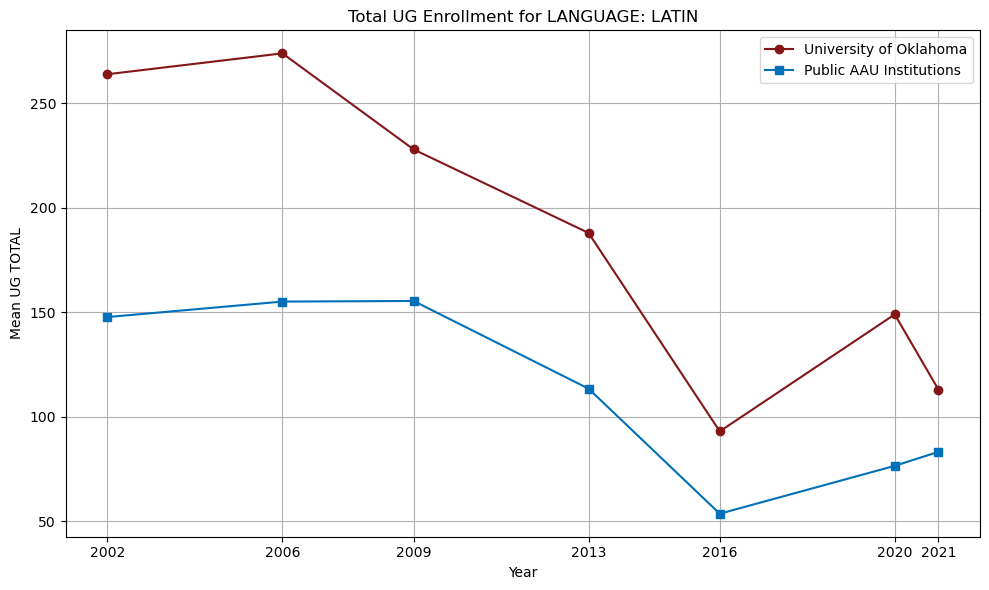

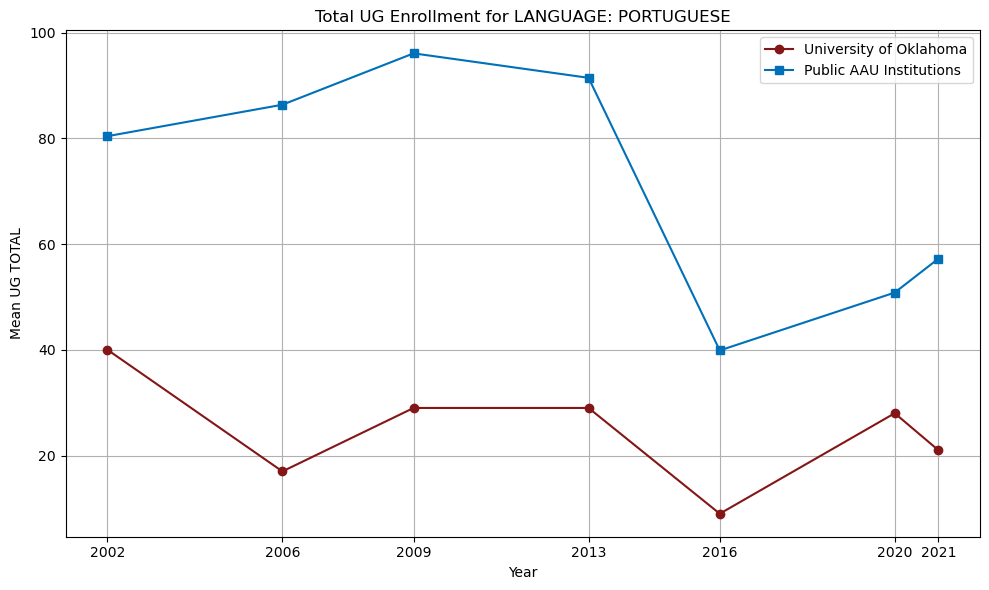

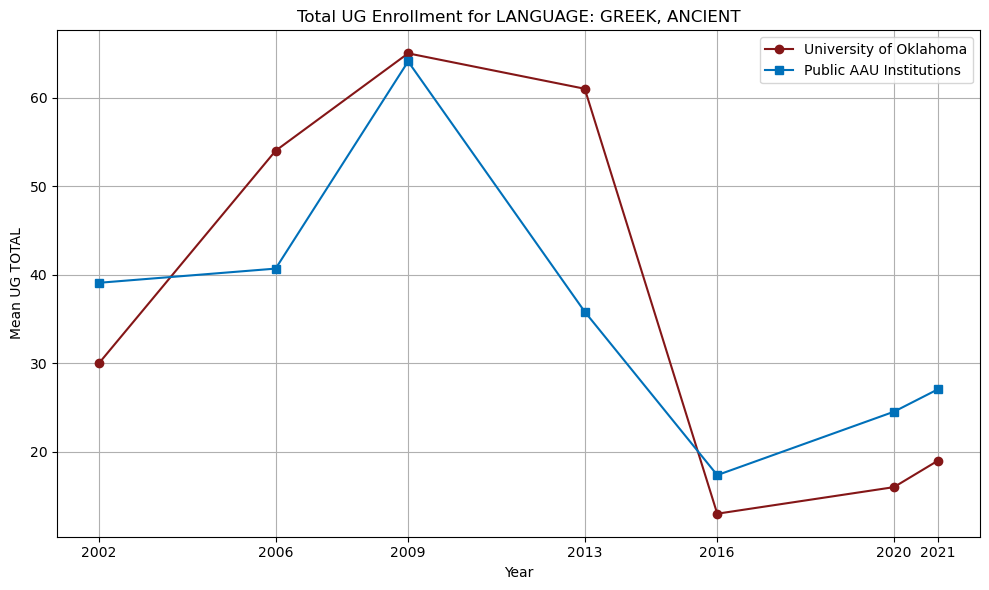

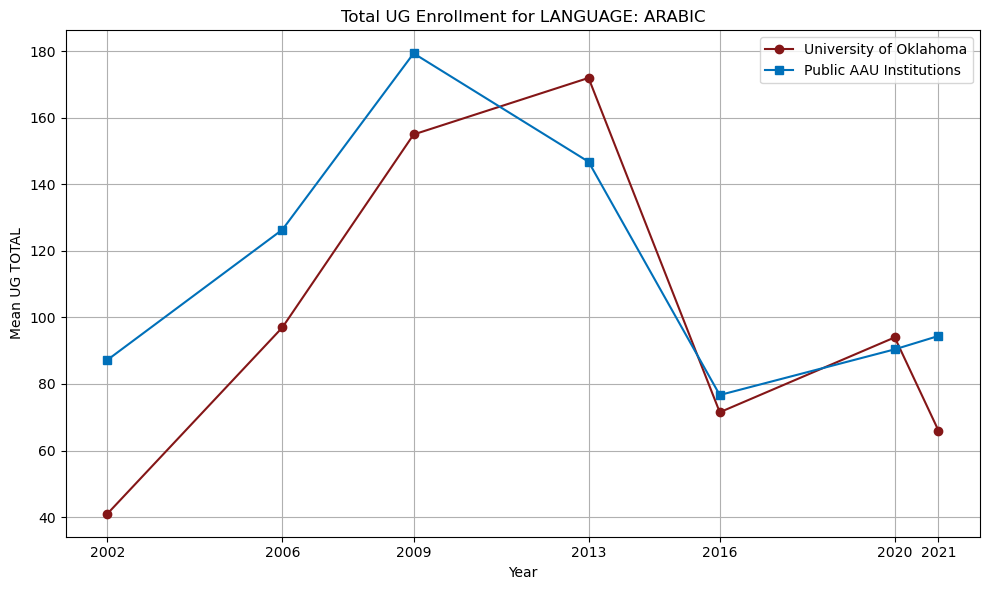

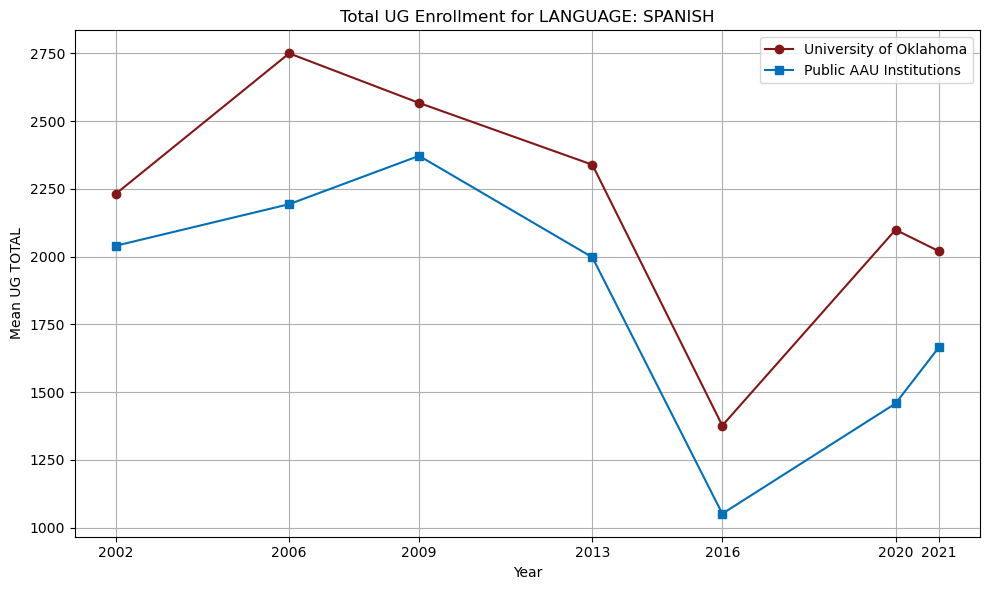

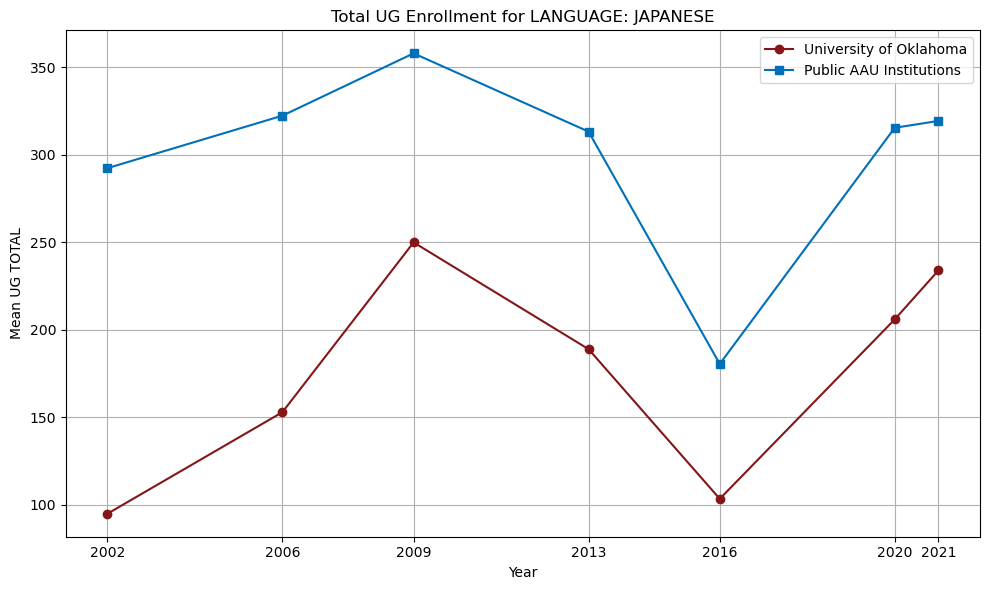

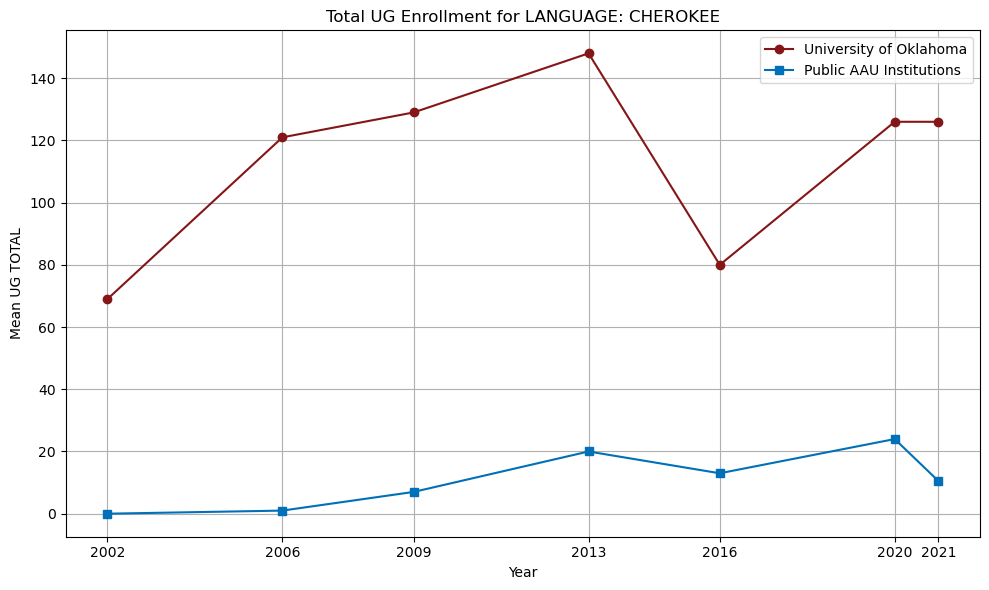

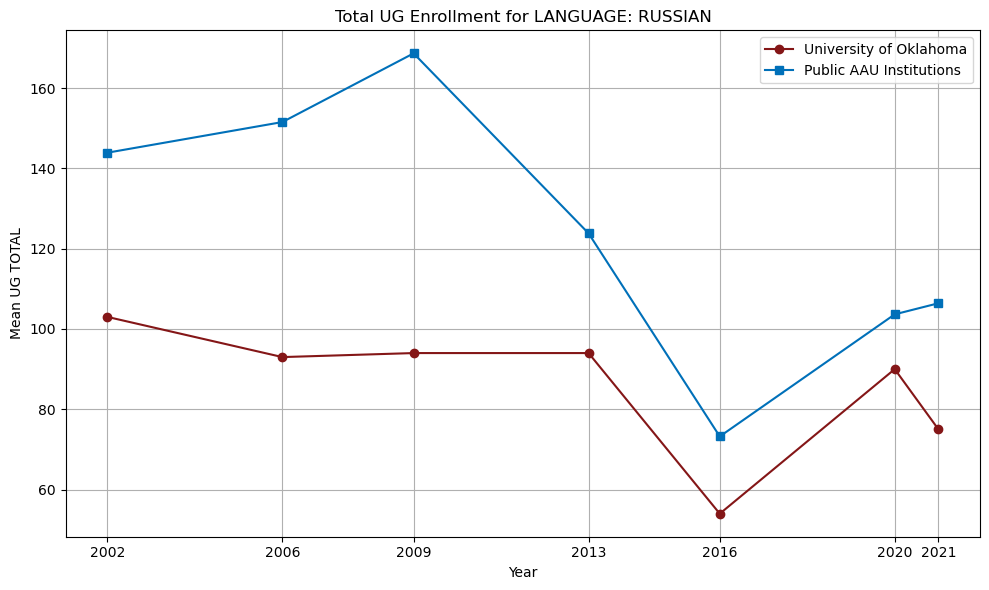

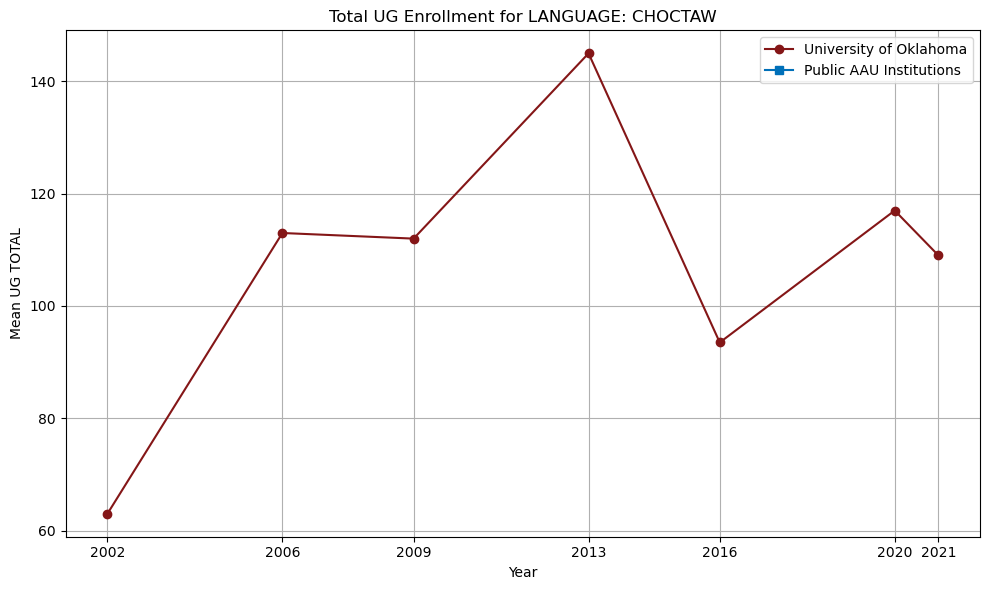

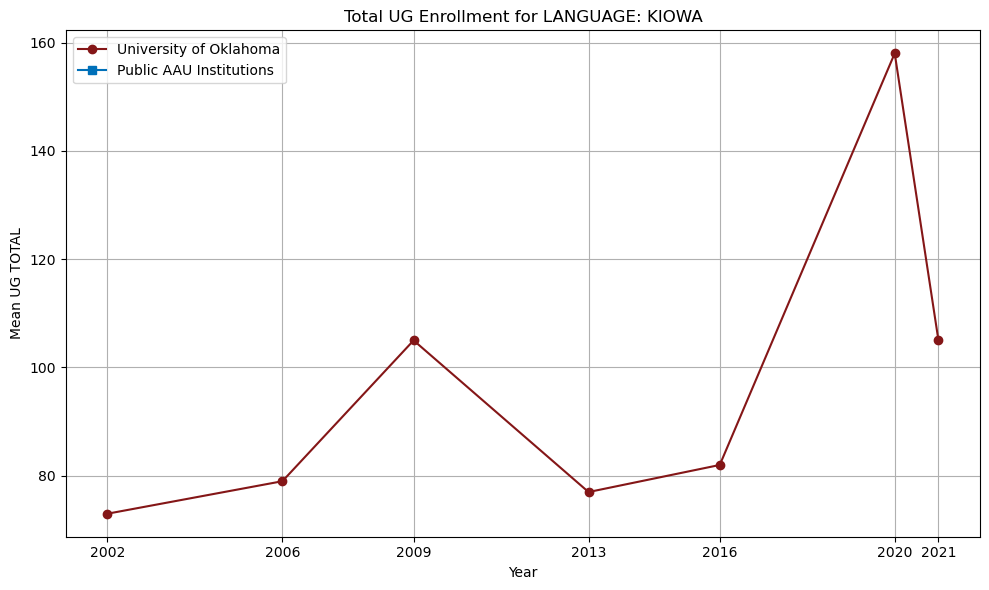

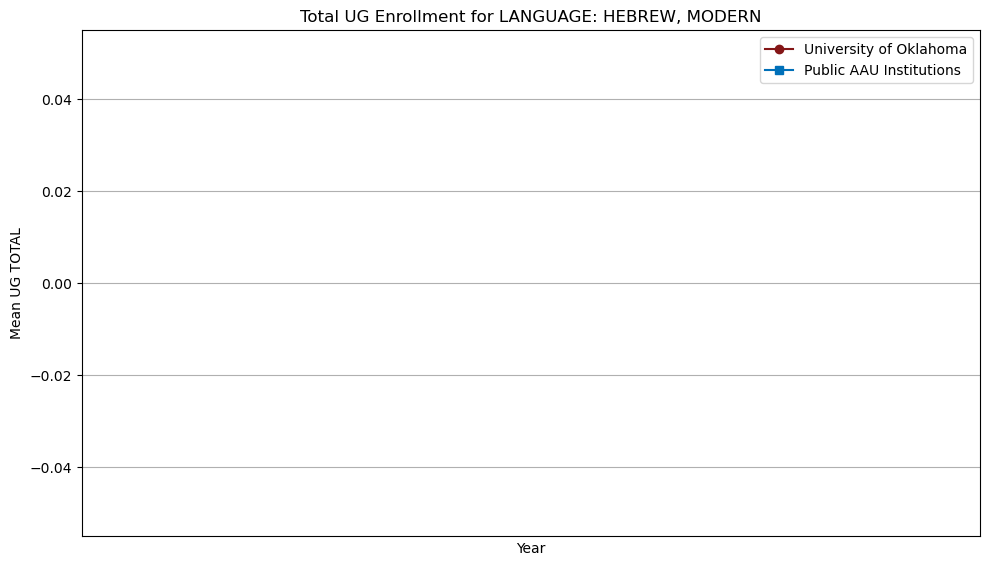

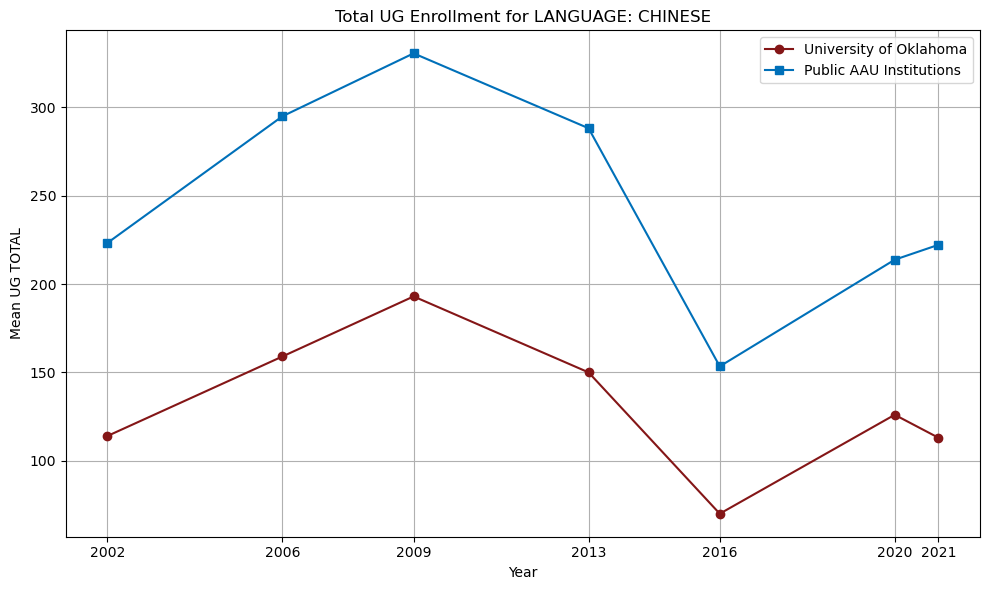

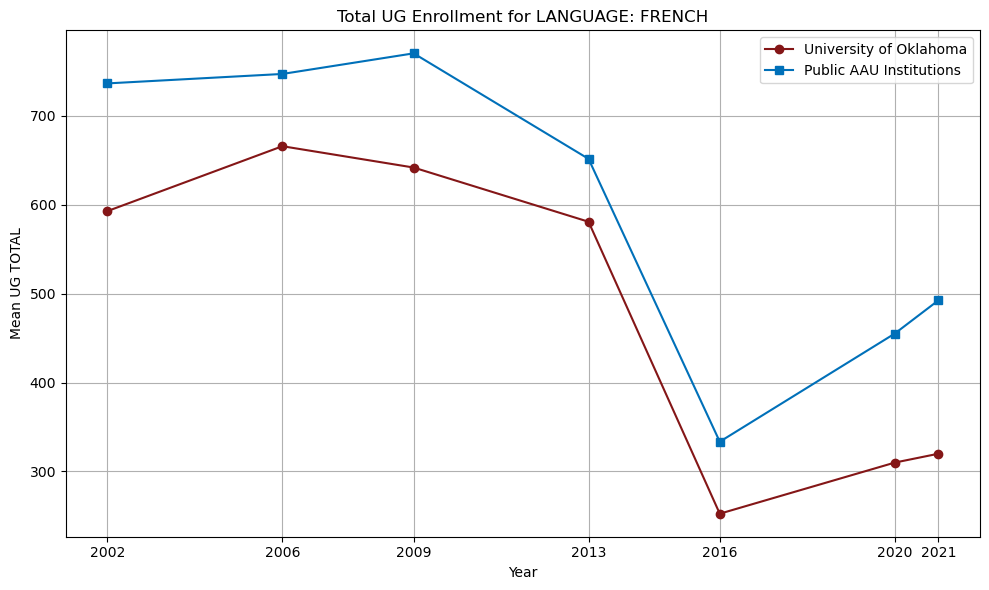

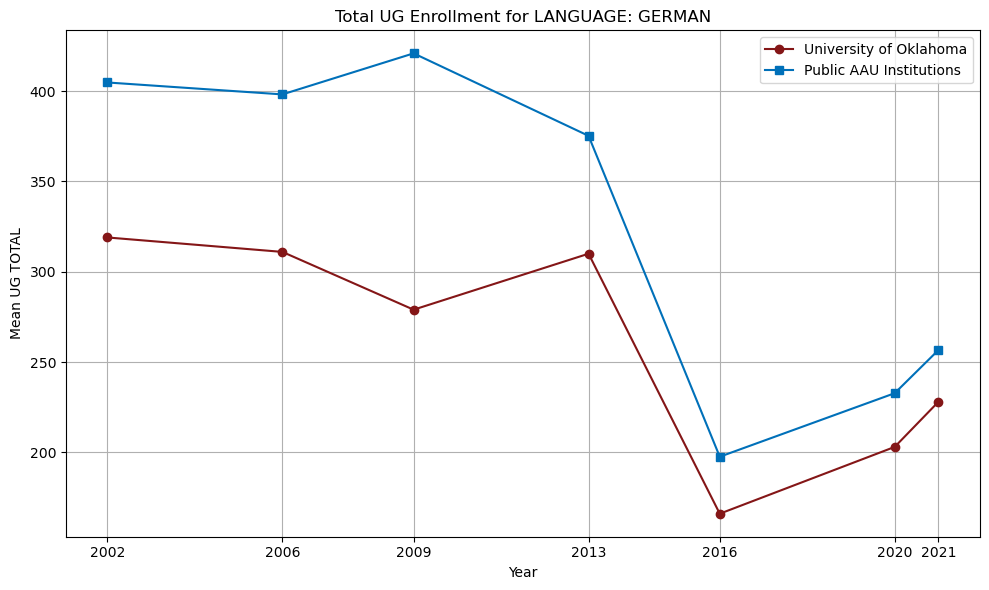

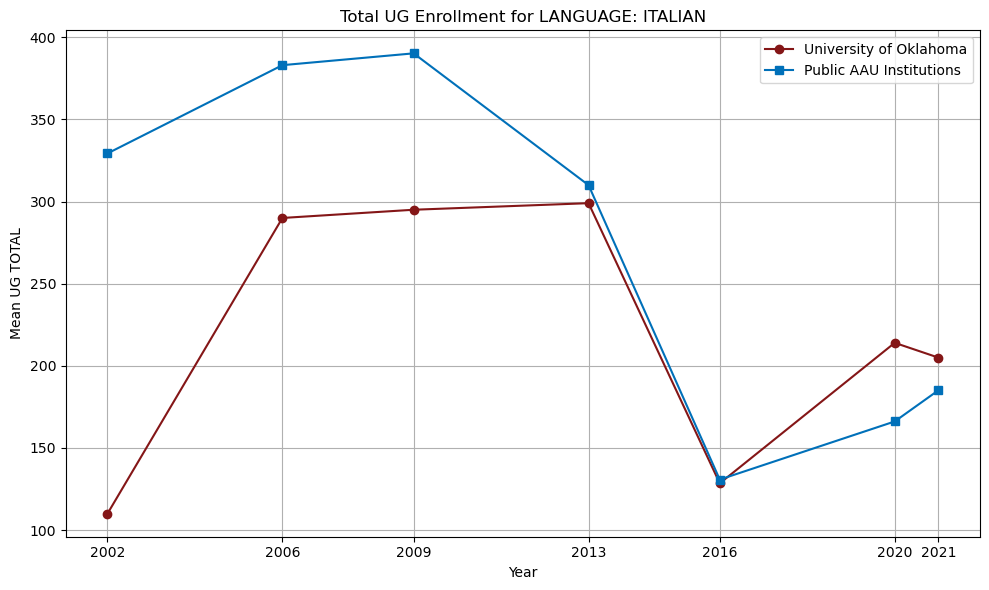

In [30]:
for language in lang_values:
    lang_compare(language)
    

In [ ]:
df[df['LANGUAGE'] == ""]

,UNIV,SRVY_YEAR,LANGUAGE,UG TOTAL,REQ,SEC
